In [2]:
import random
import numpy as np
import matplotlib.pyplot

In [3]:
def evaluate(board):
  cost = 0
  fila1 = sum(int(i) for i in board[0:4])
  fila2 = sum(int(i) for i in board[4:8])
  fila3 = sum(int(i) for i in board[8:12])
  fila4 = sum(int(i) for i in board[12:16])

  col1 = board[0] + board[4] + board[8] + board[12]
  col2 = board[1] + board[5] + board[9] + board[13]
  col3 = board[2] + board[6] + board[10] + board[14]
  col4 = board[3] + board[7] + board[11] + board[15]

  diag1 = board[0] + board[5] + board[10] + board[15]
  diag2 = board[3] + board[6] + board[9] + board[12]

  l = [fila1, fila2, fila3, fila4, col1, col2, col3, col4, diag1, diag2]
  for el in l:  cost += abs(34 - el)
  return cost

In [4]:
def select(population, evaluation, tSize):
  winner = np.random.randint(0, len(population))
  for i in range(tSize - 1):
    rival = np.random.randint(0, len(population))
    if (evaluation[rival] < evaluation[winner]): # esta buscando la que minimice la evaluación, con menor costo
      winner = rival
  return population[winner]

In [5]:
def generateRandomSquare(n):
  l = [y for y in range(1,(n*n)+1)]
  random.shuffle(l)
  return l
print(generateRandomSquare(4))

[15, 11, 1, 9, 13, 4, 16, 6, 12, 14, 8, 7, 2, 10, 5, 3]


In [6]:
def inversionSequence(l):
  listofzeros = [0] * len(l)
  for i in range (1,len(l)+1):
    s = 0
    for j in range(0, l.index(i)):
      if l[j] > i: s+= 1
    listofzeros[i - 1] = s
  return listofzeros  
print(inversionSequence([2, 7, 6, 9, 5, 1, 4, 3, 8]))

[5, 0, 5, 4, 3, 1, 0, 1, 0]


In [7]:
def crossover(p1,p2,crossover_point):
  crossover_point = int(crossover_point)
  return [item for sublist in [p1[0:crossover_point+1],p2[crossover_point+1:]] for item in sublist], [item for sublist in [p2[0:crossover_point+1],p1[crossover_point+1:]] for item in sublist]

In [8]:
def antiInversion(l):
  listofzeros = [0] * len(l)
  sq = [0] * len(l)
  listofzeros[-1] = l[-1]
  for i in reversed(range(len(l)-1)):
    listofzeros[i] = l[i]
    for j in range(i+1,len(l)):
      if listofzeros[i] <=  listofzeros[j]:
        listofzeros[j]+=1
  for i in range(0,len(listofzeros)):
    sq[listofzeros[i]] = i +1  
  return sq
print(antiInversion([5, 0, 5, 4, 3, 1, 2, 1, 0]))

[2, 9, 6, 8, 5, 1, 4, 3, 7]


In [9]:
def combine(parentA, parentB, cRate):
  import random
  # REPLACE with the actual code to combine two individuals
  if random.random() < cRate:
    newA = inversionSequence(parentA)
    newB = inversionSequence(parentB)
    offspringA, offspringB = crossover(newA,newB,cRate)
    offspringA = antiInversion(offspringA)
    offspringB = antiInversion(offspringB)
  else:
    offspringA = parentA.copy()
    offspringB = parentB.copy()
  return offspringA, offspringB

In [10]:
def mutate(individual, mRate):
  # REPLACE with the actual code to mutate an individual
  if random.random() < mRate:
    i, j = random.sample(range(0, 16), 2)
    individual[i], individual[j] = individual[j], individual[i]
  return individual

In [11]:
def geneticAlgorithm(pSize, gens, cRate, mRate):
  # Creates the initial population
  population = [None] * pSize
  evaluation = [None] * pSize
  for i in range(pSize):
    population[i] = generateRandomSquare(4)
    evaluation[i] = evaluate(population[i])
  # Keeps a record of the best individual found so far
  index = 0;
  for i in range(1, pSize):
    if (evaluation[i] < evaluation[index]):
      index = i;
  bestIndividual = population[index]
  bestEvaluation = evaluation[index]
  # Keeps the information for plotting the performance of the algorithm
  best = [0] * gens
  avg = [0] * gens
  # Runs the evolutionary process
  for i in range(gens):
    k = 0
    newPopulation = [None] * pSize
    # Crossover
    for j in range(pSize // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      offspring1, offspring2 = combine(parentA, parentB, cRate)
      newPopulation[k] = offspring1
      newPopulation[k + 1] = offspring2
      k = k + 2
    population = newPopulation
    # Mutation
    for j in range(pSize):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluate(population[j])
      # Keeps a record of the best individual found so far
      if (evaluation[j] < bestEvaluation):
        bestEvaluation = evaluation[j]
        bestIndividual = population[j]
      best[i] = bestEvaluation
      avg[i] = np.average(evaluation)
  matplotlib.pyplot.plot(range(gens), best, label = "Best")
  matplotlib.pyplot.plot(range(gens), avg, label = "Average")
  matplotlib.pyplot.legend()
  matplotlib.pyplot.title("GA Run")
  matplotlib.pyplot.show()
  # Returns the best individual found so far
  return bestIndividual, bestEvaluation   

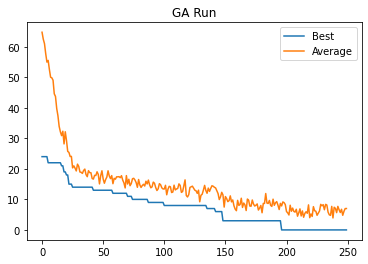

[13, 11, 8, 2, 3, 5, 16, 10, 14, 12, 1, 7, 4, 6, 9, 15]
0


In [18]:
# Tests
# =======================
solution, eval = geneticAlgorithm(100, 250, 1.0, 0.25)
print(solution)
print(eval)